<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_2018.csv to dataset_2018 (1).csv
Saving dataset_saudi.csv to dataset_saudi (1).csv


In [ ]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [ ]:
mixed_df = asd_2018_df.drop(['Case_No', 'Ethnicity','Who completed the test','Qchat-10-Score'],axis=1)
mixed_df.columns
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


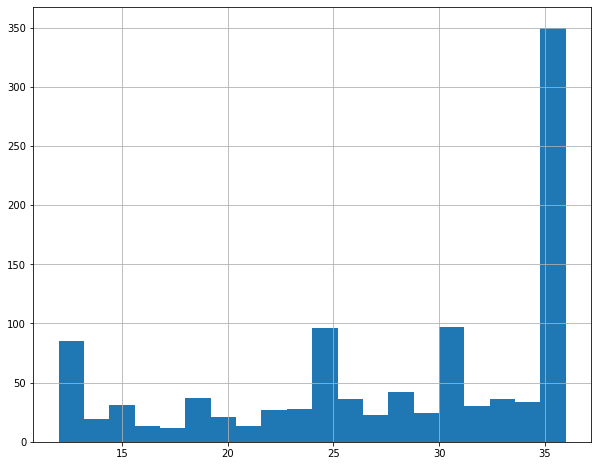

In [ ]:
mixed_df['Age_Mons'].hist(bins=20, figsize=(10,8))

In [ ]:
features=list(mixed_df)
print(features)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'ASD_Traits']


In [ ]:
from pandas.plotting import scatter_matrix

corr_matrix = mixed_df.corr()
# abs_corr_matrix = abs(corr_matrix['ASD_Traits'])
# abs_corr_matrix.sort_values(ascending=False)
# corr_matrix['ASD_Traits'].sort_values(ascending=False)

In [ ]:
from sklearn.base import BaseEstimator

class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.model_selection import train_test_split

X_mixed, y_mixed = train_test_split(mixed_df, test_size=0.3, random_state=42)

mixed_training = X_mixed.drop("ASD_Traits", axis=1)
mixed_class = X_mixed["ASD_Traits"] 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()

age = ['Age_Mons']
char_vals = ['Sex', 'Jaundice', 'Family_mem_with_ASD']
target = ['ASD_Traits']

# for c in char_vals:
#     mixed_df[c] = encoder.fit_transform(mixed_df[c].values.reshape(-1,1)).toarray()
# mixed_df.dtypes
# mixed_df.head()

In [ ]:
scale_pipeline = Pipeline([
    ('selector', DataFrameSelector(age)),
    ('scaler', scaler)
])

In [ ]:
encode_pipeine = Pipeline([
    ('selector',DataFrameSelector(char_vals)),
    ('encoder', encoder)
])

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('scale_pipeline',scale_pipeline),
    ('encode_pipeline',encode_pipeine)
])

In [ ]:
mixed_df_prepared = full_pipeline.fit_transform(mixed_training)

In [ ]:
encode_target = Pipeline([
    ('selector', DataFrameSelector(target)),
    ('encoder',encoder)
])

In [ ]:
target_prepared = encoder.fit_transform(mixed_class.values.reshape(-1,1))

In [ ]:
#Turns np array into shape (737,1) which is a column vector, not 1D array. 
target_prepared = np.argmax(target_prepared, axis=1)

In [ ]:
#Converts colum vector to 1D array
target_prepared = np.ravel(target_prepared)

In [ ]:
target_prepared.shape

(737,)

In [ ]:
print(target_prepared)

[1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 1 0 1 0 0 1 

In [ ]:
# attributes = ['Age_Mons','ASD_Traits']
# scatter_matrix(mixed_df[attributes], figsize=(25,15))

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(mixed_df_prepared, target_prepared)


LogisticRegression()

In [ ]:
mixed_df_prepared.shape

(737, 7)

In [ ]:
target_prepared.shape

(737,)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# def display_results(model, predictors, targets):
#   predictions = model.predict(predictors)
#   mse = mean_squared_error(targets, predictions)
#   rmse = np.sqrt(mse)

#   print("Root mean squared eror: ", rmse)
#   print("MSE: ", mse)
#   print("R2 Score: ", r2_score(targets, predictions))

In [ ]:
predictions = log_reg.predict(mixed_df_prepared)
log_mse = mean_squared_error(target_prepared, predictions)
log_rmse = np.sqrt(log_mse)

print("Root mean squared error:",log_rmse)
print("Mean squared error: ", log_mse)
# print("Predictions:",predictions)

print("R2 score: ",r2_score(target_prepared,predictions))

Root mean squared error: 0.5562034515458648
Mean squared error:  0.3093622795115332
R2 score:  -0.44793713163064863


In [ ]:
mixed_test = y_mixed.drop("Class/ASD Traits ", axis=1)
test_class = y_mixed["Class/ASD Traits "]

In [ ]:
from sklearn.metrics import accuracy_score

test_pred = log_reg.predict(mixed_test)

accuracy_score(test_class, test_pred)

1.0

**Feature importance ( Coefficients )**

In [ ]:
coef = np.abs(log_reg.coef_)
sorted(zip(coef[0], np.array(features)), reverse=True)

[(2.7264726964417796, 'A9'),
 (2.646512169240889, 'A2'),
 (2.511478036231528, 'A8'),
 (2.4301565202173094, 'A4'),
 (2.4068834269828527, 'A5'),
 (2.295569576725075, 'A6'),
 (2.287446144379242, 'A7'),
 (2.186927941817937, 'A1'),
 (2.118914866342107, 'A10'),
 (1.8582932673535022, 'A3'),
 (0.6179874469841613, 'Jaundice'),
 (0.3003068868128022, 'Sex'),
 (0.1145178216064329, 'Family_mem_with_ASD'),
 (0.0036237960200312795, 'Age_Mons')]

In [ ]:
sorted(zip(log_reg.coef_[0], np.array(features)), reverse=True)

[(0.6179874469841613, 'Jaundice'),
 (0.3003068868128022, 'Sex'),
 (-0.0036237960200312795, 'Age_Mons'),
 (-0.1145178216064329, 'Family_mem_with_ASD'),
 (-1.8582932673535022, 'A3'),
 (-2.118914866342107, 'A10'),
 (-2.186927941817937, 'A1'),
 (-2.287446144379242, 'A7'),
 (-2.295569576725075, 'A6'),
 (-2.4068834269828527, 'A5'),
 (-2.4301565202173094, 'A4'),
 (-2.511478036231528, 'A8'),
 (-2.646512169240889, 'A2'),
 (-2.7264726964417796, 'A9')]

**Log Odds Ratios**

In [ ]:
odds_ratios = np.exp(log_reg.coef_)
# print(odds_ratios)
sorted(zip(odds_ratios[0], np.array(features)), reverse=True)

[(1.855190612758086, 'Jaundice'),
 (1.3502731250142204, 'Sex'),
 (0.9963827620047265, 'Age_Mons'),
 (0.8917960450383697, 'Family_mem_with_ASD'),
 (0.15593854878968808, 'A3'),
 (0.12016194956665996, 'A10'),
 (0.11226109203131694, 'A1'),
 (0.1015254122969621, 'A7'),
 (0.10070401826519629, 'A6'),
 (0.0900956471385377, 'A5'),
 (0.0880230541165379, 'A4'),
 (0.08114821056403891, 'A8'),
 (0.07089806276927087, 'A2'),
 (0.06544974410307242, 'A9')]

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(log_reg, n_features_to_select=1)
selector = selector.fit(mixed_training, mixed_class)

In [ ]:
order = selector.ranking_
order

array([ 6,  3, 10,  4,  2,  8,  7,  5,  1,  9, 14, 12, 11, 13])

In [ ]:
mixed_training.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Jaundice', 'Family_mem_with_ASD'],
      dtype='object')

In [ ]:
feature_ranks = []

for i in order:
  feature_ranks.append(f"{i}. {features[i-1]}")
feature_ranks

['6. A6',
 '3. A3',
 '10. A10',
 '4. A4',
 '2. A2',
 '8. A8',
 '7. A7',
 '5. A5',
 '1. A1',
 '9. A9',
 '14. Family_mem_with_ASD',
 '12. Sex',
 '11. Age_Mons',
 '13. Jaundice']

In [ ]:
selector.score(mixed_training, mixed_class)

0.7598371777476255

In [ ]:
from sklearn.model_selection import cross_validate

metrics =['r2','neg_mean_squared_error']

cross_val_scores = cross_validate(log_reg,mixed_training,mixed_class,
                                  scoring=metrics, return_train_score=True,cv=10)

print("Test R2 scores: ", cross_val_scores['test_r2'])
print("Mean Test R2: ", cross_val_scores['test_r2'].mean())

rmse_test = np.sqrt(-cross_val_scores['test_neg_mean_squared_error']).mean()


print("Test MSE scores: ", -cross_val_scores['test_neg_mean_squared_error'])
print("Mean Test MSE: ", -cross_val_scores['test_neg_mean_squared_error'].mean())

print("Test std: ",np.sqrt(-cross_val_scores['test_neg_mean_squared_error']).std() )

print("RMSE Test: ", rmse_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test R2 scores:  [1.        1.        1.        0.9369139 1.        1.        1.
 1.        1.        1.       ]
Mean Test R2:  0.9936913895993179
Test MSE scores:  [0.         0.         0.         0.01351351 0.         0.
 0.         0.         0.         0.        ]
Mean Test MSE:  0.0013513513513513514
Test std:  0.03487429162314579
RMSE Test:  0.011624763874381928


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




In [ ]:
import pickle

pickle.dump(log_reg, open('log_reg.pkl','wb'))